## First Model: Naive Bayes (Categorical and Gaussian)
- Categorical Naive Bayes was used on all categorical attributes
- Gaussian Naive Bayes was uses on all numerical attributes

NOTE: the Gaussian Naive Bayes is included as a sanity check - the values of `avg score` and `passed` are directly calculated from the three section scores, so the model should be highly accurate

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('StudentsPerformance.csv')
df.gender = df.gender == 'male'
df.lunch = df.lunch == 'standard'
df['test preparation course'] = df['test preparation course'] == 'completed'
df['race/ethnicity'] = df['race/ethnicity'].map({'group A': 0, 'group B': 1, 'group C': 2, 'group D': 3, 'group E': 4, 'group F': 5, 'group G': 6})
df['parental level of education'] = df['parental level of education'].map({'some high school': 0, 
                                    'high school': 1, "some college": 2, "associate's degree": 3, 
                                    "bachelor's degree": 4, "master's degree": 5})

df['avg score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = df['avg score'] >= 75
df_avg = df.drop(columns=['math score', 'reading score', 'writing score'])

### categorical naive bayes classifier on the categorical attributes in our dataset

In [2]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# the target attribute is 'passed'
X = df.drop(['passed'], axis=1)
y = df['passed']

# categorical attributes: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
# numerical attributes: ['math score', 'reading score', 'writing score']
X_cat = X[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
X_num = X[['math score', 'reading score', 'writing score']]

# scale numerical data
scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num))

# split the data into training and testing set with the ratio 80:20
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat, y, test_size = 0.20, stratify=y, random_state=5)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y, test_size = 0.20, stratify=y, random_state=5)

In [3]:
#CATEGORICAL 
model_cat = CategoricalNB()
cat = model_cat.fit(X_train_cat, y_train_cat)

# Predict class labels on test data
yhat_test_cat = cat.predict(X_test_cat)

# class labels known to the classifier
print('Classes: ', cat.classes_)

# log prior probability of each class.
print('Class Log Priors: ',cat.class_log_prior_)

score_cat = model_cat.score(X_test_cat, y_test_cat)
print(f'Accuracy Score: {score_cat * 100}%')

Classes:  [False  True]
Class Log Priors:  [-0.39119245 -1.12778367]
Accuracy Score: 68.0%


### compare testing and training error

In [4]:
# CATEGORICAL
# report the testing result using a classification report
print('testing classification report - categorical')
print(classification_report(y_test_cat, yhat_test_cat))
# report the training result using a classification report
print('training classification report - categorical')
yhat_train_cat = cat.predict(X_train_cat)
print(classification_report(y_train_cat, yhat_train_cat))

testing classification report - categorical
              precision    recall  f1-score   support

       False       0.71      0.89      0.79       135
        True       0.52      0.25      0.33        65

    accuracy                           0.68       200
   macro avg       0.61      0.57      0.56       200
weighted avg       0.65      0.68      0.64       200

training classification report - categorical
              precision    recall  f1-score   support

       False       0.72      0.91      0.80       541
        True       0.58      0.25      0.35       259

    accuracy                           0.70       800
   macro avg       0.65      0.58      0.58       800
weighted avg       0.67      0.70      0.66       800



In [5]:
def TP(i, j):
    return i and j

def TN(i, j):
    return not i and not j

In [6]:
# testing
print('totals for testing set')
print(f'total positive for testing: {np.count_nonzero(yhat_test_cat)}')
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test_cat
testdf['y_test'] = np.array(y_test_cat)
print(f'TP: {np.count_nonzero(testdf.apply(lambda i: TP(i.yhat_test, i.y_test), axis=1))}')
print(f'TN: {np.count_nonzero(testdf.apply(lambda i: TN(i.yhat_test, i.y_test), axis=1))}')

# training
print('totals for training set')
print(f'total positive for training: {np.count_nonzero(yhat_train_cat)}')
traindf = pd.DataFrame()
traindf['yhat_train'] = yhat_train_cat
traindf['y_train'] = np.array(y_train_cat)
print(f'TP: {np.count_nonzero(traindf.apply(lambda i: TP(i.yhat_train, i.y_train), axis=1))}')
print(f'TN: {np.count_nonzero(traindf.apply(lambda i: TN(i.yhat_train, i.y_train), axis=1))}')

totals for testing set
total positive for testing: 31
TP: 16
TN: 120
totals for training set
total positive for training: 113
TP: 65
TN: 493


confusion matrix for categorical naive bayes model


array([[120,  15],
       [ 49,  16]])

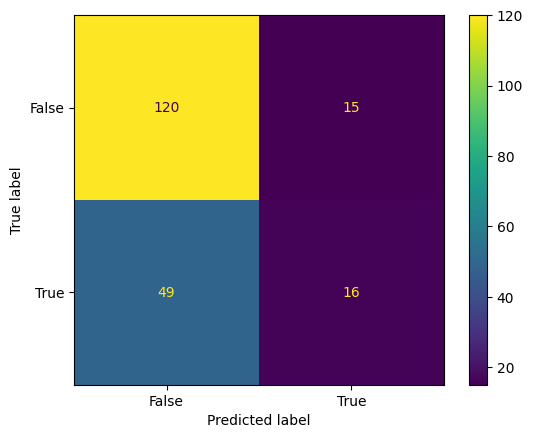

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
myconfusionmatrix_cat = confusion_matrix(y_test_cat, yhat_test_cat)
print('confusion matrix for categorical naive bayes model')
display(myconfusionmatrix_cat)

mycmdisp_cat = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix_cat, display_labels=model_cat.classes_)
mycmdisp_cat.plot()

## Calculations of TP, FP, TN, FN for CategoricalNB model
### Testing

- total positive = 31
- total negative = 200 - 31 = 169

- true positive = 16
- false positive = 31 - 16 = 15

- true negative = 120
- false negative = 169 - 120 = 49

### Training

- total positive = 113
- total negative = 800 - 113 = 687

- true positive = 65
- false positive = 113 - 65 = 48

- true negative = 493
- false negative = 687 - 493 = 194
